In [1]:
!ls

class.csv  sample_data		  test.csv  train.csv
drive	   sample_submission.csv  test.zip  train.zip


In [2]:
!mkdir train
!cp train.zip train/
!unzip train/train.zip -d train

!mkdir test
!cp test.zip test/
!rm train.zip test.zip
!unzip test/test.zip -d test
!rm train/train.zip
!rm test/test.zip

Archive:  train/train.zip
  inflating: train/train_00001.jpg   
  inflating: train/train_00002.jpg   
  inflating: train/train_00003.jpg   
  inflating: train/train_00004.jpg   
  inflating: train/train_00005.jpg   
  inflating: train/train_00006.jpg   
  inflating: train/train_00007.jpg   
  inflating: train/train_00008.jpg   
  inflating: train/train_00009.jpg   
  inflating: train/train_00010.jpg   
  inflating: train/train_00011.jpg   
  inflating: train/train_00012.jpg   
  inflating: train/train_00013.jpg   
  inflating: train/train_00014.jpg   
  inflating: train/train_00015.jpg   
  inflating: train/train_00016.jpg   
  inflating: train/train_00017.jpg   
  inflating: train/train_00018.jpg   
  inflating: train/train_00019.jpg   
  inflating: train/train_00020.jpg   
  inflating: train/train_00021.jpg   
  inflating: train/train_00022.jpg   
  inflating: train/train_00023.jpg   
  inflating: train/train_00024.jpg   
  inflating: train/train_00025.jpg   
  inflating: train/train

In [3]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras import models, layers 
from keras import callbacks
from keras.applications import Xception
import cv2
import time
from sklearn.model_selection import train_test_split
import warnings
from keras import optimizers
from keras.models import load_model

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
img = cv2.imread(f'/content/train/{train_df.iloc[0, 0]}')

In [6]:
img.shape

(500, 700, 3)

In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chop """
  
  if f'{data_type}_chop' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chop')
  else:
    os.mkdir(f'{data_type}_chop')                                                # make directory
    
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')               # load image
    cv2.waitKey(0)
    
    crop_img = img[path_df.iloc[i, 2] : path_df.iloc[i, 4],     # y : y + h
                   path_df.iloc[i,1] : path_df.iloc[i, 3]]     # x : x + w

    cv2.imwrite(f'/content/{data_type}_chop/{path_df.iloc[i,0]}', crop_img)     # save the image
    
    cv2.waitKey(0)

In [0]:
chop_img('train', train_df)

In [0]:
y = train_df['class']
x = train_df.drop('class', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [0]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [0]:
validation_set = pd.concat([X_test, y_test], axis=1)

In [13]:
print(train_df.shape)
print('-----------------')
print(train_set.shape)
print(validation_set.shape)

(10016, 6)
-----------------
(8012, 6)
(2004, 6)


In [14]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
3058,train_03059.jpg,20,130,607,421,79
1240,train_01241.jpg,31,114,460,325,78
9584,train_09585.jpg,83,93,686,425,3
6642,train_06643.jpg,271,712,1429,1132,153
7442,train_07443.jpg,24,148,528,343,66


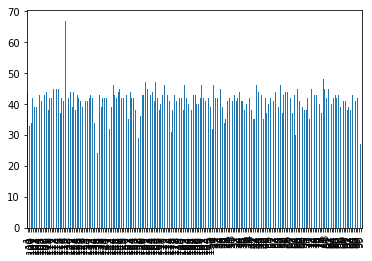

In [15]:
train_set['class'].value_counts().sort_index().plot(kind='bar')

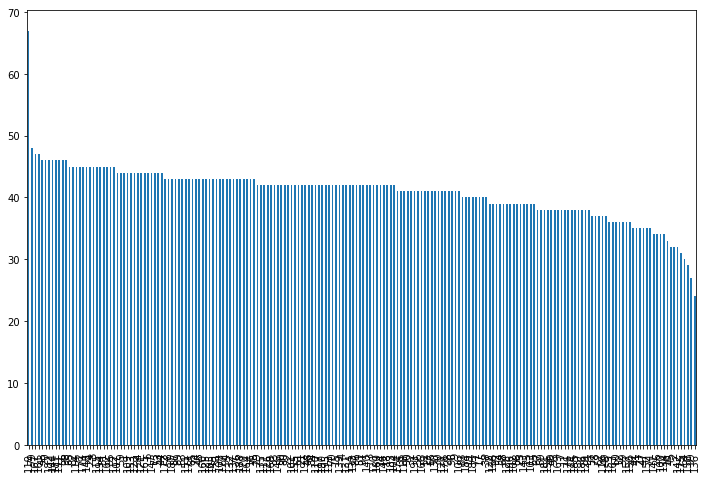

In [16]:
plt.figure(figsize=(12,8))
train_set['class'].value_counts().plot(kind='bar')

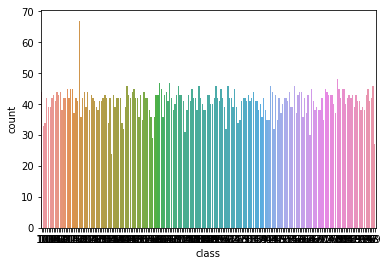

In [17]:
sns.countplot(train_set['class'])

In [18]:
train_set['class'].nunique()

196

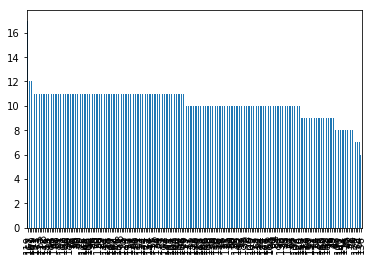

In [19]:
validation_set['class'].value_counts().plot(kind='bar')

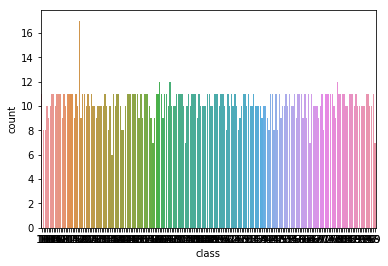

In [20]:
sns.countplot(validation_set['class'])

In [21]:
validation_set['class'].nunique()

196

Split Validation set  0.2 for Hold out set

In [22]:
validation_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
6873,train_06874.jpg,26,83,594,361,159
694,train_00695.jpg,100,73,706,516,173
3804,train_03805.jpg,40,66,269,164,14
8307,train_08308.jpg,64,17,442,251,105
3237,train_03238.jpg,74,43,569,407,99


In [0]:
val_x = validation_set.drop('class', axis=1)
val_y = validation_set['class']

In [0]:
X_val, X_hol, y_val, y_hol = train_test_split(val_x, val_y, test_size= 0.2, stratify = val_y)

In [25]:
print(X_val.shape, y_val.shape)

(1603, 5) (1603,)


In [0]:
validation_set = pd.concat([X_val, y_val], axis=1)
hold_out_set = pd.concat([X_hol, y_hol], axis=1)

In [27]:
print(validation_set.shape)
print(hold_out_set.shape)

(1603, 6)
(401, 6)


In [28]:
print('validation : ', validation_set['class'].nunique())
print('hold_out : ', hold_out_set['class'].nunique())

validation :  196
hold_out :  196


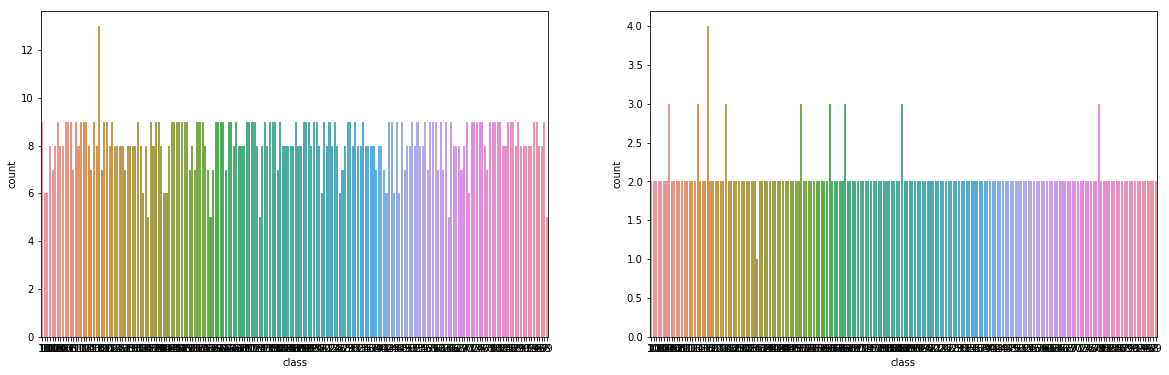

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('class', data = validation_set)

plt.subplot(1,2,2)
sns.countplot('class', data = hold_out_set)

Spliting Done

In [30]:
print('Training Set, "train_set" :', train_set.shape)
print('Validation Set, "validation_set" :', validation_set.shape)
print('Hold Out Set, "hold_out_set" :', hold_out_set.shape)

Training Set, "train_set" : (8012, 6)
Validation Set, "validation_set" : (1603, 6)
Hold Out Set, "hold_out_set" : (401, 6)


In [31]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
3058,train_03059.jpg,20,130,607,421,79
1240,train_01241.jpg,31,114,460,325,78
9584,train_09585.jpg,83,93,686,425,3
6642,train_06643.jpg,271,712,1429,1132,153
7442,train_07443.jpg,24,148,528,343,66


In [0]:
datagen = image.ImageDataGenerator(rescale=1./255,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2, 
                                  rotation_range=20,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  shear_range=0.2)

validation_gen = image.ImageDataGenerator(rescale = 1./255)

holdout_gen = image.ImageDataGenerator(rescale = 1./255)

### Caused OOM, reduce batch_size 32 to 20

In [33]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(299,299), class_mode='categorical', batch_size=20)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=20)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=20)

Found 8012 validated image filenames belonging to 196 classes.
Found 1603 validated image filenames belonging to 196 classes.
Found 401 validated image filenames belonging to 196 classes.


In [34]:
i = 0
for batch in holdout_data:
  img_array = batch[0]
  #print(img_array.shape)
  #print(img_array[i])
  for j in range(len(batch[0])):
    plt.figure(j)
    plt.imshow(img_array[j])
    
  i += 1
  if i % 5:
    break

Output hidden; open in https://colab.research.google.com to view.

In [35]:
xception_model = Xception(include_top = False,
                         input_shape = (299,299,3))

W0707 05:00:23.818696 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 05:00:23.859884 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 05:00:23.867964 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 05:00:23.908771 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 05:00:23.910020 1403049061

83689472/83683744 [==============================] - 3s 0us/step


In [36]:
xception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [37]:
xception_model.get_layer('block1_conv1_act').activation

<function keras.activations.relu>

In [0]:
from keras import backend as k
from tensorflow.nn import swish


In [39]:
type(swish)

tensorflow.python.framework.function._OverloadedFunction

In [0]:
def swishs(x):
  return x*k.sigmoid(x)

In [47]:
type(swishs)

function

In [48]:
for ind ,i in enumerate(xception_model.layers):
  if 'Activation' in str(i): 
    print(i.activation)

<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <lambda> at 0x7f9ae8ab56a8>
<function <l

Change Activation to Swish

In [0]:
for ind ,i in enumerate(xception_model.layers):
  if 'Activation' in str(i):    
    i.activation = swishs

Check the Activation is change correctly

In [50]:
for ind ,i in enumerate(xception_model.layers):
  if 'Activation' in str(i):
    print(i.activation)

<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8a21268>
<function swishs at 0x7f9ae8

In [51]:
xception_model.get_layer('block1_conv1_act').activation

<function __main__.swishs>

## Change Activation to swish : 
## $x * sigmoid(x)$   to Xception net
## Global Average pooling used

In [0]:
model = models.Sequential()
model.add(xception_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2048, activation = swishs))
model.add(layers.Dense(196, activation='softmax'))
model.summary()

W0706 04:16:25.131941 139784145278848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0706 04:16:25.612928 139784145278848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 196)               401604    
Total params: 25,459,436
Trainable params: 25,404,908
Non-trainable params: 54,528
_________________________________________________________________


In [0]:
my_optimizer = optimizers.sgd(lr=0.01, momentum=0.6, nesterov=True) 

In [0]:
check_points = callbacks.ModelCheckpoint('car_clf.h5', monitor = 'val_loss', save_best_only=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

W0705 13:14:26.630020 139640347203456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(299,299), class_mode='categorical', batch_size=20)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=20)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=20)

Found 8012 validated image filenames belonging to 196 classes.
Found 1603 validated image filenames belonging to 196 classes.
Found 401 validated image filenames belonging to 196 classes.


In [0]:
model_history = model.fit_generator(train_data, steps_per_epoch= 8012//20, epochs = 100, validation_data=valid_data, validation_steps=1603//20, callbacks=[check_points])

Epoch 1/100
400/400 [==============================] - 762s 2s/step - loss: 5.2555 - acc: 0.0099 - val_loss: 5.1642 - val_acc: 0.0188
Epoch 2/100
400/400 [==============================] - 749s 2s/step - loss: 5.0408 - acc: 0.0191 - val_loss: 4.8275 - val_acc: 0.0246
Epoch 3/100
400/400 [==============================] - 746s 2s/step - loss: 4.7535 - acc: 0.0393 - val_loss: 4.4840 - val_acc: 0.0701
Epoch 4/100
400/400 [==============================] - 746s 2s/step - loss: 4.3861 - acc: 0.0974 - val_loss: 4.0063 - val_acc: 0.1251
Epoch 5/100
400/400 [==============================] - 747s 2s/step - loss: 3.8198 - acc: 0.1868 - val_loss: 3.2879 - val_acc: 0.2767
Epoch 6/100
400/400 [==============================] - 748s 2s/step - loss: 3.1176 - acc: 0.3087 - val_loss: 2.5201 - val_acc: 0.4087
Epoch 7/100
400/400 [==============================] - 742s 2s/step - loss: 2.4350 - acc: 0.4449 - val_loss: 2.0221 - val_acc: 0.5009
Epoch 8/100
400/400 [==============================] - 742s 2s

KeyboardInterrupt: ignored

In [0]:
#!cp /content/car_clf.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/Model_save/xception_swish_1.h5

### the same model but change optimizer to rmsprop

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

W0706 04:18:19.527763 139784145278848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model_history = model.fit_generator(train_data, steps_per_epoch= 8012//20, epochs = 100, validation_data=valid_data, validation_steps=1603//20, callbacks=[check_points])

W0706 04:18:45.250035 139784145278848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
400/400 [==============================] - 381s 951ms/step - loss: 5.1009 - acc: 0.0168 - val_loss: 9.0184 - val_acc: 0.0119
Epoch 2/100
400/400 [==============================] - 366s 915ms/step - loss: 4.4294 - acc: 0.0530 - val_loss: 5.6789 - val_acc: 0.0499
Epoch 3/100
400/400 [==============================] - 363s 908ms/step - loss: 3.7190 - acc: 0.1180 - val_loss: 4.0649 - val_acc: 0.1219
Epoch 4/100
400/400 [==============================] - 363s 908ms/step - loss: 3.1620 - acc: 0.1945 - val_loss: 3.6681 - val_acc: 0.1838
Epoch 5/100
400/400 [==============================] - 363s 908ms/step - loss: 2.6534 - acc: 0.2917 - val_loss: 2.7166 - val_acc: 0.2893
Epoch 6/100
400/400 [==============================] - 364s 909ms/step - loss: 2.2885 - acc: 0.3676 - val_loss: 2.5636 - val_acc: 0.3474
Epoch 7/100
400/400 [==============================] - 364s 909ms/step - loss: 1.9802 - acc: 0.4445 - val_loss: 2.0750 - val_acc: 0.4795
Epoch 8/100
400/400 [====================

KeyboardInterrupt: ignored

In [0]:
model.get_weights()

In [0]:
model.evaluate_generator(holdout_data, steps = 401//20)

[1.0601006858936541, 0.8425196787816646]

In [0]:
model = load_model('model_file_name.h5', custom_objects={'MEAN_LANDMARKS': MEAN_LANDMARKS})

In [0]:
# swishs = lambda x: x*k.sigmoid(x)

In [0]:
def swishs(x):
  z = x * k.sigmoid(x)
  return z

In [0]:
my_optimizer

In [0]:
my_optimizer = optimizers.sgd(lr=0.005, momentum=0.6, nesterov=True) 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

In [0]:
model_history = model.fit_generator(train_data, steps_per_epoch= 8012//20, epochs = 100, validation_data=valid_data, validation_steps=1603//20, callbacks=[check_points])

Epoch 1/100
400/400 [==============================] - 364s 911ms/step - loss: 0.0897 - acc: 0.9747 - val_loss: 0.8241 - val_acc: 0.8806
Epoch 2/100
400/400 [==============================] - 354s 884ms/step - loss: 0.0634 - acc: 0.9805 - val_loss: 0.8439 - val_acc: 0.8737
Epoch 3/100
400/400 [==============================] - 353s 884ms/step - loss: 0.0519 - acc: 0.9823 - val_loss: 0.8203 - val_acc: 0.8793
Epoch 4/100
400/400 [==============================] - 353s 883ms/step - loss: 0.0522 - acc: 0.9837 - val_loss: 0.7815 - val_acc: 0.8806
Epoch 5/100
400/400 [==============================] - 353s 884ms/step - loss: 0.0519 - acc: 0.9862 - val_loss: 0.7853 - val_acc: 0.8825
Epoch 6/100
400/400 [==============================] - 353s 882ms/step - loss: 0.0433 - acc: 0.9856 - val_loss: 0.7977 - val_acc: 0.8800
Epoch 7/100
 33/400 [=>............................] - ETA: 5:08 - loss: 0.0400 - acc: 0.9879

KeyboardInterrupt: ignored

In [0]:
1e-5

1e-05

In [0]:
my_optimizer = optimizers.sgd(lr=1e-5, momentum=0.6, nesterov=True) 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

In [0]:
model_history = model.fit_generator(train_data, steps_per_epoch= 8012//20, epochs = 100, validation_data=valid_data, validation_steps=1603//20, callbacks=[check_points])

Epoch 1/100
400/400 [==============================] - 367s 916ms/step - loss: 0.0490 - acc: 0.9851 - val_loss: 0.7368 - val_acc: 0.8876
Epoch 2/100
400/400 [==============================] - 354s 886ms/step - loss: 0.0515 - acc: 0.9825 - val_loss: 0.8315 - val_acc: 0.8781
Epoch 3/100
400/400 [==============================] - 354s 885ms/step - loss: 0.0510 - acc: 0.9855 - val_loss: 0.7525 - val_acc: 0.8863
Epoch 4/100
400/400 [==============================] - 354s 885ms/step - loss: 0.0413 - acc: 0.9874 - val_loss: 0.8147 - val_acc: 0.8819
Epoch 5/100
400/400 [==============================] - 354s 886ms/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.7688 - val_acc: 0.8831
Epoch 6/100
400/400 [==============================] - 354s 886ms/step - loss: 0.0416 - acc: 0.9861 - val_loss: 0.8105 - val_acc: 0.8825
Epoch 7/100
 66/400 [===>..........................] - ETA: 4:40 - loss: 0.0405 - acc: 0.9894

KeyboardInterrupt: ignored

In [0]:
best_model = load_model('/content/car_clf.h5', custom_objects={'function':swishs})

### top accuracy is 88.76%

## swish with drop out

In [52]:
model = models.Sequential()
model.add(xception_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2048, activation = swishs))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(196, activation='softmax'))
model.summary()

W0707 05:06:10.247323 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0707 05:06:10.821560 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0707 05:06:13.728383 140304906143616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               401604    
Total params: 25,459,436
Trainable params: 25,404,908
Non-trainable params: 54,528
_________________________________________________________________


In [0]:
my_optimizer = optimizers.sgd(lr=0.01, momentum=0.6, nesterov=True) 

In [0]:
check_points = callbacks.ModelCheckpoint('car_clf.h5', monitor = 'val_loss', save_best_only=True)

In [60]:
model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

W0707 05:10:13.731242 140304906143616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [61]:
model_history = model.fit_generator(train_data, steps_per_epoch= 8012//20, epochs = 100, validation_data=valid_data, validation_steps=1603//20, callbacks=[check_points])

W0707 05:10:20.819842 140304906143616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
400/400 [==============================] - 731s 2s/step - loss: 5.2507 - acc: 0.0084 - val_loss: 5.1176 - val_acc: 0.0188
Epoch 2/100
400/400 [==============================] - 720s 2s/step - loss: 5.0083 - acc: 0.0159 - val_loss: 4.7995 - val_acc: 0.0202
Epoch 3/100
400/400 [==============================] - 717s 2s/step - loss: 4.8003 - acc: 0.0278 - val_loss: 4.6150 - val_acc: 0.0714
Epoch 4/100
400/400 [==============================] - 719s 2s/step - loss: 4.5107 - acc: 0.0718 - val_loss: 4.1708 - val_acc: 0.1485
Epoch 5/100
400/400 [==============================] - 719s 2s/step - loss: 4.0419 - acc: 0.1462 - val_loss: 3.5245 - val_acc: 0.2426
Epoch 6/100
400/400 [==============================] - 718s 2s/step - loss: 3.3726 - acc: 0.2540 - val_loss: 2.7313 - val_acc: 0.3841
Epoch 7/100
400/400 [==============================] - 718s 2s/step - loss: 2.6493 - acc: 0.3928 - val_loss: 2.0614 - val_acc: 0.5148
Epoch 8/100
400/400 [==============================] - 717s 2s

KeyboardInterrupt: ignored

In [0]:
!cp /content/car_clf.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/Model_save/xception_swish_dropout.h5

In [0]:
loaded_model = load_model('/content/car_clf.h5', custom_objects={'swishs':swishs})

In [76]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               401604    
Total params: 25,459,436
Trainable params: 25,404,908
Non-trainable params: 54,528
_________________________________________________________________


In [0]:
my_opt = optimizers.sgd(lr=0.001, momentum=0.5, nesterov=True)

In [0]:
my_optimizer = optimizers.sgd(lr=1e-5, momentum=0.6, nesterov=True) 

In [0]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

In [79]:
model_history = model.fit_generator(train_data, steps_per_epoch= 8012//20, epochs = 100, validation_data=valid_data, validation_steps=1603//20, callbacks=[check_points])

Epoch 1/100
400/400 [==============================] - 724s 2s/step - loss: 0.0430 - acc: 0.9897 - val_loss: 0.5026 - val_acc: 0.8699
Epoch 2/100
400/400 [==============================] - 716s 2s/step - loss: 0.0392 - acc: 0.9900 - val_loss: 0.4347 - val_acc: 0.8926
Epoch 3/100
400/400 [==============================] - 717s 2s/step - loss: 0.0351 - acc: 0.9922 - val_loss: 0.4570 - val_acc: 0.8787
Epoch 4/100
  5/400 [..............................] - ETA: 11:11 - loss: 0.0555 - acc: 0.9900

KeyboardInterrupt: ignored

In [0]:
#!cp /content/car_clf.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/Model_save/xception_swish_dropout_best.h5